In [65]:
import easyocr
import cv2
import time

In [71]:

start_time = time.time()
img = cv2.imread('./processed_image.png')
reader = easyocr.Reader(['en']) 
result = reader.readtext(img)

end_time = time.time()
elapsed_time = end_time - start_time

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [72]:
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

# Print results (optional)
for detection in result:
    print(detection[1],end=' ')

Elapsed time: 5.85 seconds
GVI2 RZB 

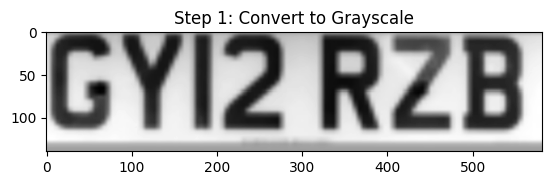

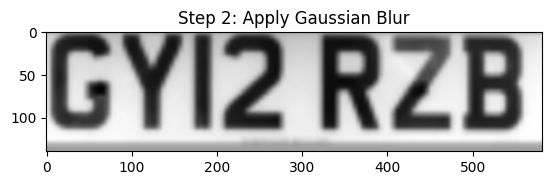

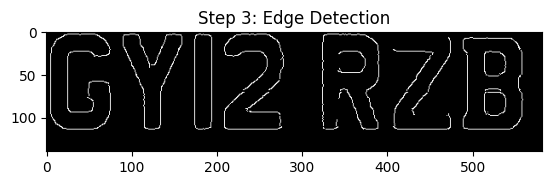

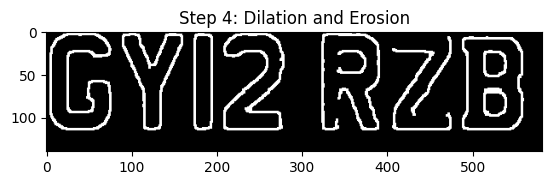

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


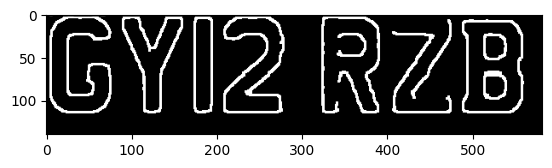

OCR took 7.0064215660095215 seconds.


In [76]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
import easyocr

# Load the image
image = cv2.imread('./procesed_image.png')

# Convert the image to grayscale
start_time = time.time()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Step 1: Convert to Grayscale')
plt.show()

# Apply Gaussian blur to remove noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')
plt.title('Step 2: Apply Gaussian Blur')
plt.show()

# Perform edge detection
edges = cv2.Canny(blurred, 30, 150)
plt.imshow(edges, cmap='gray')
plt.title('Step 3: Edge Detection')
plt.show()

# Perform a dilation and erosion to close gaps in between object edges
dilated = cv2.dilate(edges, None, iterations=2)
eroded = cv2.erode(dilated, None, iterations=1)
plt.imshow(eroded, cmap='gray')
plt.title('Step 4: Dilation and Erosion')
plt.show()

# Save the processed image
cv2.imwrite('processed_image.png', eroded)

# Perform OCR using EasyOCR
reader = easyocr.Reader(['en'])
result = reader.readtext(eroded)

# Print the OCR result
for detection in result:
    top_left = tuple(map(int, detection[0][0]))
    bottom_right = tuple(map(int, detection[0][2]))
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(eroded, top_left, bottom_right, (0, 255, 0), 3)
    img = cv2.putText(img, text, top_left, font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    
plt.imshow(img, cmap='gray')
plt.show()

end_time = time.time() 
print(f"OCR took {end_time - start_time} seconds.")

In [74]:
import easyocr
import time
import cv2
from matplotlib import pyplot as plt

# Load the processed image
image = cv2.imread('procesed_image.png', 0)

# Create a reader to do OCR.
reader = easyocr.Reader(['en'])

# Start the timer
start_time = time.time()

# Do the OCR.
result = reader.readtext(image)

# End the timer
end_time = time.time()

# Print how long the OCR took
print(f"OCR took {end_time - start_time} seconds.")

# Print the OCR result
for detection in result:
    print(detection[1])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


OCR took 0.5056850910186768 seconds.
GYI2 RZB
